# Implementation 6 - Logistic regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,no
1,15810944,Male,35,20000,no
2,15668575,Female,26,43000,no
3,15603246,Female,27,57000,no
4,15804002,Male,19,76000,no
5,15728773,Male,27,58000,no
6,15598044,Female,27,84000,no
7,15694829,Female,32,150000,yes
8,15600575,Male,25,33000,no
9,15727311,Female,35,65000,no


## Inspecting the data set

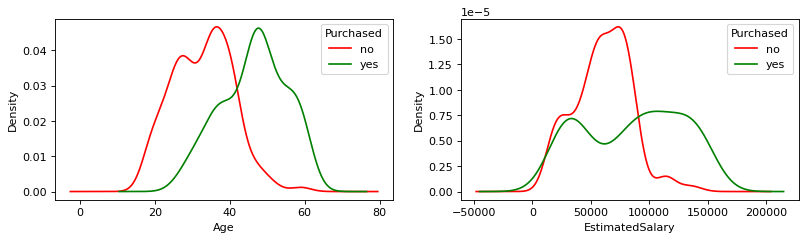

In [5]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i_purchase, purchase in enumerate(['no', 'yes']):
        (dataset[feature_list[i_axs]][dataset['Purchased']==purchase]).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='Purchased')
plt.show()   

Alternative:

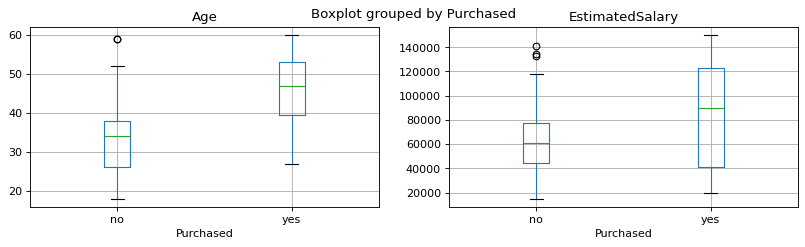

In [6]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    dataset.boxplot(column=feature_list[i_axs], by='Purchased', ax=axs[i_axs])
plt.show()  

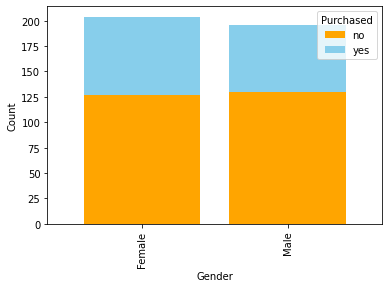

In [7]:
df_plot = dataset.groupby(['Gender', 'Purchased']).size().reset_index().pivot(index='Gender', columns='Purchased', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show() 

## Preparing the data set

**Predictors and target:**

In [8]:
X = dataset[['Age', 'EstimatedSalary']].values
print(X[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [9]:
print(dataset['Purchased'][:10].values)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']


**Encoding:**

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Purchased'])
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


**Train-test split:**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


In [12]:
print(X_train[:10])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


**Feature scaling:**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

## Training the logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

We can check what prediction is made on some examples:

* A 30 years old user with a salary of 200,000:

In [16]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30,200000]]))))

['yes']


* A 30 years old user with a salary of 100,000:

In [17]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[30,100000]]))))

['no']


## Making predictions

**Probability of purchasing:**

In [18]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456]])

**Prediction of the class and comparison with the true one:**

In [19]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


## Plotting class domains

**On training set**

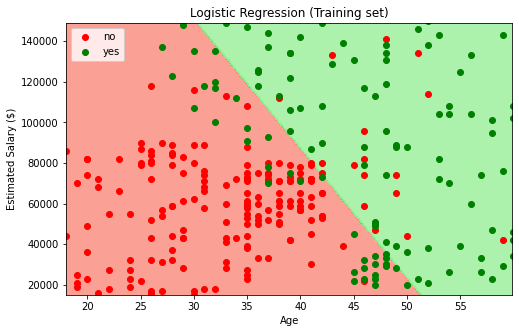

In [37]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5))

# Preparation of the data set that will be displayed (without scaling)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)

# Creation of a data grid (for the decision area)
X_step = 0.1  # Grid step on X-axis
Y_step = 1000  # Grid step on Y-axis
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

# Plotting the decision boundary
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

# Plotting the data set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

# Configuration of the figure
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()

plt.show()

**On test set**

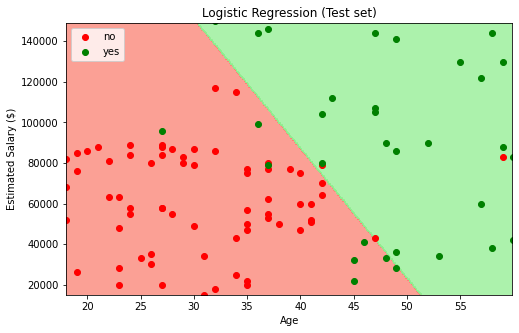

In [26]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5))

# Preparation of the data set that will be displayed (without scaling)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)

# Creation of a data grid (for the decision area)
X_step = 0.1  # Grid step on X-axis
Y_step = 1000  # Grid step on Y-axis
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

# Plotting the decision boundary
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

# Plotting the data set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

# Configuration of the figure
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()

plt.show()